# Bag of Words Analysis (SVM, RandomForest, LogisticRegression @ 500 column count)

In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
data = pd.read_csv('train.txt', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
data2 = pd.read_csv('test.txt', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
a= list(data2.columns)
b = ['song_id', 'index']
b = b + a
b = b[0:5000]
data2.columns = b

In [4]:
data.head()

,song_id,index,i,the,you,to,and,a,me,it,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
0,TRAAAAV128F421A322,4623710,1:6,2:4,3:2,4:2,5:5,6:3,7:1,8:1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAAABD128F429CF47,6477168,1:10,3:17,4:8,5:2,6:2,7:1,8:3,9:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAAAED128E0783FAB,2516445,1:28,2:15,3:2,4:12,5:22,6:2,7:2,8:4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAAAEF128F4273421,3759847,1:5,2:4,3:3,4:2,5:1,6:11,9:4,12:9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAAAEW128F42930C0,3783760,1:4,4:5,5:7,6:2,7:4,9:1,10:1,11:9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
datafull = pd.concat([data,data2],sort=False)

In [6]:
datafull.head()

,song_id,index,i,the,you,to,and,a,me,it,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
0,TRAAAAV128F421A322,4623710,1:6,2:4,3:2,4:2,5:5,6:3,7:1,8:1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAAABD128F429CF47,6477168,1:10,3:17,4:8,5:2,6:2,7:1,8:3,9:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAAAED128E0783FAB,2516445,1:28,2:15,3:2,4:12,5:22,6:2,7:2,8:4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAAAEF128F4273421,3759847,1:5,2:4,3:3,4:2,5:1,6:11,9:4,12:9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAAAEW128F42930C0,3783760,1:4,4:5,5:7,6:2,7:4,9:1,10:1,11:9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
small = datafull.iloc[:,0:502]

In [8]:
ids = small.iloc[:,0:2]
other = small.iloc[:,2:]

In [9]:
other.head()

,i,the,you,to,and,a,me,it,not,in,...,sad,laugh,esta,happen,went,cest,blow,noch,meet,whole
0,1:6,2:4,3:2,4:2,5:5,6:3,7:1,8:1,11:1,12:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1:10,3:17,4:8,5:2,6:2,7:1,8:3,9:2,10:3,11:4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1:28,2:15,3:2,4:12,5:22,6:2,7:2,8:4,9:2,10:1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1:5,2:4,3:3,4:2,5:1,6:11,9:4,12:9,13:3,15:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1:4,4:5,5:7,6:2,7:4,9:1,10:1,11:9,15:1,17:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
other = other.fillna('0:0')

In [11]:
def getnum(x):
    return(int(x.split(':',1)[1]))

In [12]:
other = other.apply(np.vectorize(getnum))

In [93]:
for x in other:
    print(sum(other[x]))

2495736
2012876
1966891
1363336
1300376
1167902
1095517
1100488
1005909
907313
905365
848982
810960
799429
792738
755276
724117
697478
679717
650208
629067
617112
606904
593581
583474
574263
570011
561646
553192
547536
539570
528050
518200
512708
502456
492068
483228
475122
467675
460551
452729
444990
437410
428771
419377
411148
404020
395553
386682
376607
371518
363211
355143
350015
342560
334883
326823
319315
310521
304161
298694
290371
283584
275754
270457
262666
255778
250886
242186
235121
229342
223519
217745
210376
202761
197735
191299
184876
179127
174097
166732
162394
157521
151555
146733
141102
136845
132253
126588
122405
117035
114039
109715
105490
102122
97013
93548
91472
87088
84578
81029
79871
75309
72893
70883
67260
65019
62554
60285
58419
57089
55177
52360
51275
49157
47456
45988
44906
43382
41944
40684
39788
38599
36627
35994
34766
34572
32956
32900
31890
30870
29861
29308
28059
28047
27050
26337
25570
25318
24501
24389
23803
23439
22714
22853
21922
21716
20783
21190
20

In [13]:
#removed = other.loc[:,(other.iloc[:].sum() >= 100)]
removed = other

In [14]:
removed.shape

(237662, 500)

In [15]:
removed.head()

,i,the,you,to,and,a,me,it,not,in,...,sad,laugh,esta,happen,went,cest,blow,noch,meet,whole
0,6,4,2,2,5,3,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,10,17,8,2,2,1,3,2,3,4,...,0,0,0,0,0,0,0,0,0,0
2,28,15,2,12,22,2,2,4,2,1,...,0,0,0,0,0,0,0,0,0,0
3,5,4,3,2,1,11,4,9,3,2,...,0,0,0,0,0,0,0,0,0,0
4,4,5,7,2,4,1,1,9,1,2,...,0,0,0,0,0,0,0,0,0,0


In [16]:
combo = pd.concat([ids, other], axis=1,sort=False)

In [17]:
combo.head()

,song_id,index,i,the,you,to,and,a,me,it,...,sad,laugh,esta,happen,went,cest,blow,noch,meet,whole
0,TRAAAAV128F421A322,4623710,6,4,2,2,5,3,1,1,...,0,0,0,0,0,0,0,0,0,0
1,TRAAABD128F429CF47,6477168,10,17,8,2,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0
2,TRAAAED128E0783FAB,2516445,28,15,2,12,22,2,2,4,...,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,3759847,5,4,3,2,1,11,4,9,...,0,0,0,0,0,0,0,0,0,0
4,TRAAAEW128F42930C0,3783760,4,5,7,2,4,1,1,9,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#genres = pd.read_csv('audio.csv')
#genres = genres[['track_id','Tag1']]
xtrain = pd.read_csv('X_train.csv')
ytrain = pd.read_csv('y_train.csv', header = None)
xtest = pd.read_csv('X_test.csv')
ytest = pd.read_csv('y_test.csv', header = None)

In [45]:
xtrain = xtrain[['track_id']]
xtest = xtest[['track_id']]
ytrain.columns = ['ind','genre']
ytest.columns = ['ind', 'genre']
ytrain = ytrain[['genre']]
ytest = ytest[['genre']]

In [48]:
train = xtrain
test = xtest
train['genre'] = ytrain.genre
test['genre'] = ytest.genre

In [51]:
train.columns = ['song_id','genre']
test.columns = ['song_id','genre']

In [52]:
trainmerge = pd.merge(train, combo)

In [53]:
testmerge = pd.merge(test, combo)

In [54]:
testmerge.head()

,song_id,genre,index,i,the,you,to,and,a,me,...,sad,laugh,esta,happen,went,cest,blow,noch,meet,whole
0,TRZWOMY128F424D9A3,Rock,6611763,31,5,5,1,16,1,2,...,0,0,0,0,0,0,0,0,0,0
1,TRNNLEG12903CBB5AF,Rock,8974803,25,17,29,7,4,1,22,...,0,0,0,0,0,0,0,0,0,0
2,TRRVVAX128F92DEB6D,Pop,2189514,11,10,30,8,4,4,2,...,0,0,0,0,0,0,0,0,0,0
3,TRWQUOH128F14778C6,Electronic,1256411,7,8,2,1,5,1,3,...,0,0,0,0,0,0,0,0,0,0
4,TRQSPPS128F4284B6C,Country,911128,13,8,6,3,9,4,3,...,0,0,0,0,0,0,0,0,0,0


In [55]:
finaltest = testmerge.drop(columns=['song_id','index'])
finaltrain = trainmerge.drop(columns=['song_id','index'])

In [57]:
finaltrain.head()

,genre,i,the,you,to,and,a,me,it,not,...,sad,laugh,esta,happen,went,cest,blow,noch,meet,whole
0,Rock,6,6,12,7,1,1,2,5,3,...,0,0,0,0,0,0,0,0,0,0
1,Rap,1,1,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Electronic,1,1,1,1,1,6,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Rock,9,1,1,3,8,24,1,7,1,...,0,0,0,0,0,0,0,0,0,0
4,Rock,6,5,7,1,6,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm

In [59]:
asmatrixtest = finaltest.iloc[:,1:].as_matrix()
asmatrixtrain = finaltrain.iloc[:,1:].as_matrix()

C:\ProgramData\Anaconda3\Lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [61]:
asmatrixtrain

array([[ 6,  6, 12, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       ...,
       [18, 12,  5, ...,  0,  0,  0],
       [ 2,  9, 11, ...,  0,  0,  0],
       [ 5,  4,  7, ...,  0,  0,  0]])

In [62]:
transformedtest = TfidfTransformer().fit_transform(asmatrixtest)
transformedtrain = TfidfTransformer().fit_transform(asmatrixtrain)

In [63]:
transformedtest = transformedtest.toarray()
transformedtrain = transformedtrain.toarray()

In [64]:
transformedtest = pd.DataFrame(transformedtest)
transformedtrain = pd.DataFrame(transformedtrain)

In [65]:
transformedtest.columns = finaltest.iloc[:,1:].columns
transformedtrain.columns = finaltrain.iloc[:,1:].columns

In [67]:
transformedtrain.head()

,i,the,you,to,and,a,me,it,not,in,...,sad,laugh,esta,happen,went,cest,blow,noch,meet,whole
0,0.233657,0.233657,0.467420,0.272908,0.039031,0.039066,0.078191,0.195802,0.117632,0.196304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333057,0.333057,0.666265,0.333433,0.333810,0.334112,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.105505,0.105505,0.105528,0.105624,0.105743,0.635032,0.105918,0.106094,0.106230,0.106366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.202836,0.022537,0.022542,0.067689,0.180707,0.542610,0.022626,0.158643,0.022692,0.090885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.321601,0.268000,0.375285,0.053661,0.322328,0.107540,0.107621,0.053899,0.053969,0.270188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
#finished = pd.concat([final.genre, transformed], axis=1,sort=False)

In [69]:
train_x = transformedtrain
train_y = finaltrain.genre
test_x = transformedtest
test_y = finaltest.genre

In [73]:
train_y.head()

0          Rock
1           Rap
2    Electronic
3          Rock
4          Rock
Name: genre, dtype: object

In [68]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [114]:
#train_x, test_x, train_y, test_y = train_test_split(finished.iloc[:,1:], finished.genre,test_size = .3)

In [74]:
classifier = LogisticRegression(solver='sag',multi_class='multinomial')
classifier.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
scores = cross_val_score(classifier, test_x, test_y, cv=5)
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

Accuracy: 51.42 percent


In [76]:
svmclassifier = svm.SVC(C=10,gamma='scale')
svmclassifier.fit(train_x, train_y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
scores = cross_val_score(svmclassifier, test_x, test_y, cv=5)
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

Accuracy: 51.57 percent


In [78]:
rfclassifier = RandomForestClassifier()
rfclassifier.fit(train_x, train_y)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
scores = cross_val_score(rfclassifier, test_x, test_y, cv=5)
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

Accuracy: 45.87 percent


In [91]:
predictions = rfclassifier.predict(test_x)

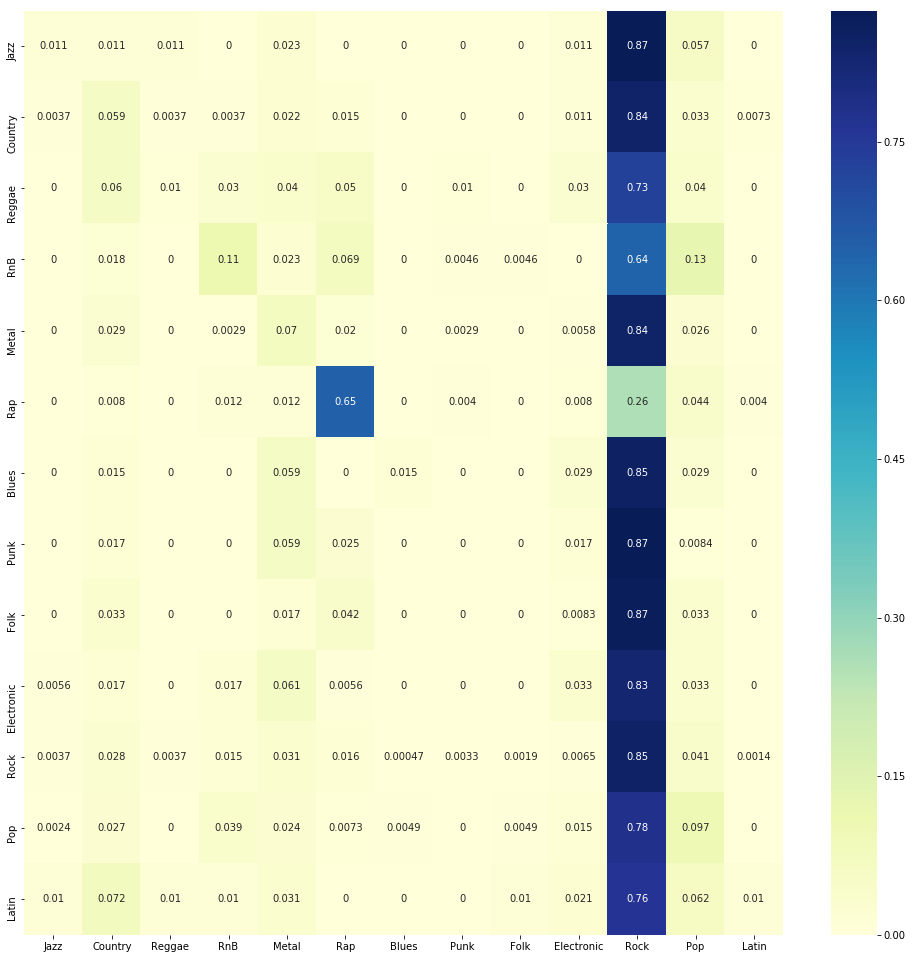

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

d = list(set(test_y.values))
conf = confusion_matrix(test_y, predictions, labels = d)
normed_matrix = normalize(conf, axis=1, norm='l1')
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(normed_matrix, cmap="YlGnBu", ax = ax, xticklabels = d, yticklabels = d, annot = True)

In [77]:
finished.to_csv('tfidf.csv',index=False)

In [79]:
finished.genre.value_counts()

Rock          8762
Pop           1615
Metal         1393
Country       1125
Rap           1030
RnB            864
Electronic     667
Punk           504
Reggae         412
Folk           411
Jazz           356
Latin          299
Blues          263
World           60
New Age         27
Name: genre, dtype: int64

In [122]:
finished.shape

(17788, 401)